In [1]:
# –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫
import sys
import pandas as pd
import torch
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# –î–æ–±–∞–≤–ª—è–µ–º –ø–∞–ø–∫—É src –≤ –ø—É—Ç—å –¥–ª—è –∏–º–ø–æ—Ä—Ç–∞
sys.path.append('src')

# –ò–º–ø–æ—Ä—Ç –Ω–∞—à–∏—Ö –º–æ–¥—É–ª–µ–π
from src import (
    prepare_datasets,
    NextTokenDataset,
    TextLSTM,
    calculate_rouge_lstm,
    evaluate_transformer
)

# –ù–∞—Å—Ç—Ä–æ–π–∫–∏ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è
pd.set_option('display.max_colwidth', None)
plt.style.use('ggplot')

=== –≠–¢–ê–ü 1: –ü–û–î–ì–û–¢–û–í–ö–ê –î–ê–ù–ù–´–• ===

–ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö...
–£—Å–ø–µ—à–Ω–æ –∑–∞–≥—Ä—É–∂–µ–Ω–æ 1600498 —Å—Ç—Ä–æ–∫
–í–∑—è—Ç–∞ —Å–ª—É—á–∞–π–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞ –∏–∑ 200000 –ø—Ä–∏–º–µ—Ä–æ–≤
–û—á–∏—Å—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞...
–¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è...
–î–∞–Ω–Ω—ã–µ –ø–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω—ã. Train: 159675, Val: 19959, Test: 19960
–ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Å–ª–æ–≤–∞—Ä—è...
–†–∞–∑–º–µ—Ä —Å–ª–æ–≤–∞—Ä—è: 10002
–ü—Ä–∏–º–µ—Ä—ã –æ—á–∏—â–µ–Ω–Ω—ã—Ö —Ç–µ–∫—Å—Ç–æ–≤:
1. it's tomorrow and of course i'm coming silly! i is talkin about today, yo
2. i'm going to watch the new episode of trueblood again.
3. holds on as hits the gas at least, if i get whiplash, we have magic vodka!

–†–∞–∑–º–µ—Ä —Å–ª–æ–≤–∞—Ä—è: 10002
–†–∞–∑–º–µ—Ä —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏: 159675
–†–∞–∑–º–µ—Ä –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏: 19959


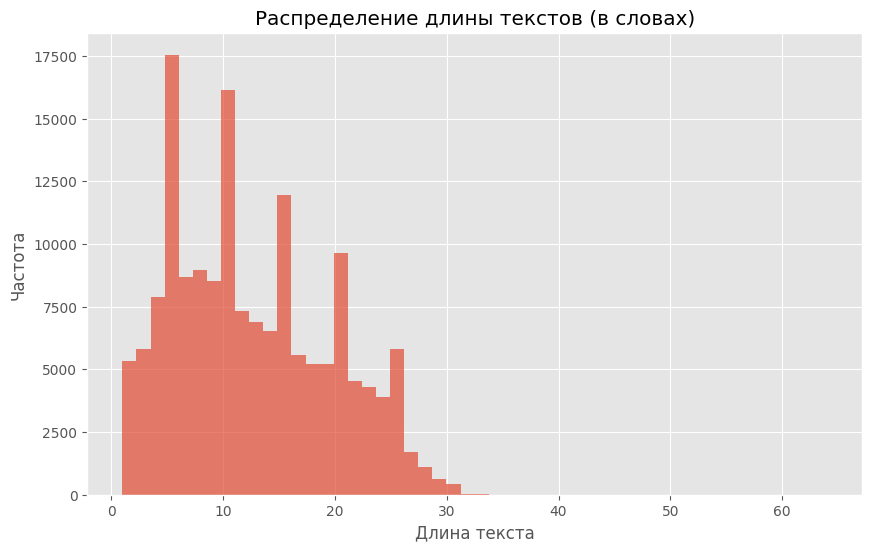

–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ —Ç–µ–∫—Å—Ç–∞: 12.67 —Å–ª–æ–≤
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞: 64 —Å–ª–æ–≤


In [2]:
# –≠—Ç–∞–ø 1: –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
print("=== –≠–¢–ê–ü 1: –ü–û–î–ì–û–¢–û–í–ö–ê –î–ê–ù–ù–´–• ===\n")

# –ó–∞–ø—É—Å–∫–∞–µ–º –ø–æ–¥–≥–æ—Ç–æ–≤–∫—É –¥–∞–Ω–Ω—ã—Ö
word_to_idx, idx_to_word = prepare_datasets()

# –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏
train_df = pd.read_csv('data/train.csv')
val_df = pd.read_csv('data/val.csv')

print("–ü—Ä–∏–º–µ—Ä—ã –æ—á–∏—â–µ–Ω–Ω—ã—Ö —Ç–µ–∫—Å—Ç–æ–≤:")
for i, text in enumerate(train_df['text_clean'].head(3)):
    print(f"{i+1}. {text}")

print(f"\n–†–∞–∑–º–µ—Ä —Å–ª–æ–≤–∞—Ä—è: {len(word_to_idx)}")
print(f"–†–∞–∑–º–µ—Ä —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏: {len(train_df)}")
print(f"–†–∞–∑–º–µ—Ä –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏: {len(val_df)}")

# –ê–Ω–∞–ª–∏–∑ –¥–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–æ–≤
train_lengths = train_df['text_clean'].str.split().apply(len)
plt.figure(figsize=(10, 6))
plt.hist(train_lengths, bins=50, alpha=0.7)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–æ–≤ (–≤ —Å–ª–æ–≤–∞—Ö)')
plt.xlabel('–î–ª–∏–Ω–∞ —Ç–µ–∫—Å—Ç–∞')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.show()

print(f"–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ —Ç–µ–∫—Å—Ç–∞: {train_lengths.mean():.2f} —Å–ª–æ–≤")
print(f"–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞: {train_lengths.max()} —Å–ª–æ–≤")

In [3]:
# –≠—Ç–∞–ø 2: –°–æ–∑–¥–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ –∏ –¥–∞—Ç–∞–ª–æ–∞–¥–µ—Ä–æ–≤# 2. –û–±—É—á–µ–Ω–∏–µ LSTM –º–æ–¥–µ–ª–∏
PYTORCH_CUDA_ALLOC_CONF=True
print("\n=== –≠–¢–ê–ü 2: –û–ë–£–ß–ï–ù–ò–ï LSTM –ú–û–î–ï–õ–ò ===")
# (–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –∑–∞–¥–∞–Ω—ã –≤ lstm_train.py)
# –ó–¥–µ—Å—å –º—ã –ø—Ä–æ—Å—Ç–æ –∑–∞–ø—É—Å–∫–∞–µ–º –ø—Ä–æ—Ü–µ—Å—Å
from src.lstm_train import train_model
model, train_losses, val_losses = train_model()


=== –≠–¢–ê–ü 2: –û–ë–£–ß–ï–ù–ò–ï LSTM –ú–û–î–ï–õ–ò ===
Using device: cuda
Loading data...
–†–∞–∑–º–µ—Ä –±–∞—Ç—á–∞: 64
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–∞—Ç—á–µ–π –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: 2495
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–∞—Ç—á–µ–π –≤ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: 312

–§–æ—Ä–º–∞ –≤—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö: torch.Size([64, 30])
–§–æ—Ä–º–∞ —Ü–µ–ª–µ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö: torch.Size([64, 30])


Epoch 1/5: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2495/2495 [00:56<00:00, 44.17it/s, loss=4.9000]


Epoch 1 | Average Train Loss: 5.3190
Epoch 1 | Validation Loss: 4.7854


Epoch 2/5: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2495/2495 [00:56<00:00, 44.17it/s, loss=4.8327]


Epoch 2 | Average Train Loss: 4.7137
Epoch 2 | Validation Loss: 4.5562
ROUGE Scores: {'rouge1': 0.07393766725190874, 'rouge2': 0.010352941176470587}


Epoch 3/5: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2495/2495 [00:56<00:00, 44.02it/s, loss=4.4323]


Epoch 3 | Average Train Loss: 4.5329
Epoch 3 | Validation Loss: 4.4582


Epoch 4/5: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2495/2495 [00:57<00:00, 43.70it/s, loss=4.1517]


Epoch 4 | Average Train Loss: 4.4273
Epoch 4 | Validation Loss: 4.4007
ROUGE Scores: {'rouge1': 0.09825083653876224, 'rouge2': 0.009176470588235293}


Epoch 5/5: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2495/2495 [00:57<00:00, 43.74it/s, loss=4.2043]


Epoch 5 | Average Train Loss: 4.3524
Epoch 5 | Validation Loss: 4.3665
Training finished. Model saved.


In [4]:
# 3. –û—Ü–µ–Ω–∫–∞ LSTM –º–æ–¥–µ–ª–∏
print("\n=== –≠–¢–ê–ü 3: –û–¶–ï–ù–ö–ê LSTM –ú–û–î–ï–õ–ò ===")
from src.next_token_dataset import NextTokenDataset

val_df = pd.read_csv('data/val.csv')
val_dataset = NextTokenDataset(val_df, word_to_idx, seq_length=30)
rouge_scores_lstm = calculate_rouge_lstm(model, val_dataset, word_to_idx, num_samples=50)

print(f"LSTM ROUGE-1: {rouge_scores_lstm['rouge1']:.4f}")
print(f"LSTM ROUGE-2: {rouge_scores_lstm['rouge2']:.4f}")


=== –≠–¢–ê–ü 3: –û–¶–ï–ù–ö–ê LSTM –ú–û–î–ï–õ–ò ===
LSTM ROUGE-1: 0.0444
LSTM ROUGE-2: 0.0100


In [5]:
# 4. –û—Ü–µ–Ω–∫–∞ Transformer –º–æ–¥–µ–ª–∏
print("\n=== –≠–¢–ê–ü 4: –û–¶–ï–ù–ö–ê TRANSFORMER –ú–û–î–ï–õ–ò ===")
rouge_scores_transformer = evaluate_transformer()
print(f"Transformer ROUGE-1: {rouge_scores_transformer['rouge1']:.4f}")
print(f"Transformer ROUGE-2: {rouge_scores_transformer['rouge2']:.4f}")


=== –≠–¢–ê–ü 4: –û–¶–ï–ù–ö–ê TRANSFORMER –ú–û–î–ï–õ–ò ===
Loading model distilgpt2...
Using device: GPU


Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Both `max_new_tokens` (=20) and `max_length`(=47) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=20) and `max_length`(=40) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=20) and `max_length`(=62) seem to have been set. `max_new_tokens` will take preced

Transformer (distilgpt2) ROUGE-1: 0.0331, ROUGE-2: 0.0034
Transformer ROUGE-1: 0.0331
Transformer ROUGE-2: 0.0034


In [6]:
# 5. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∏ –≤—ã–≤–æ–¥—ã
print("\n=== –≠–¢–ê–ü 5: –°–†–ê–í–ù–ï–ù–ò–ï –ò –í–´–í–û–î–´ ===")
print("\n–°—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Ç–∞–±–ª–∏—Ü–∞:")
print("–ú–æ–¥–µ–ª—å      | ROUGE-1 | ROUGE-2")
print("------------|---------|--------")
print(f"LSTM        | {rouge_scores_lstm['rouge1']:.4f}  | {rouge_scores_lstm['rouge2']:.4f}")
print(f"Transformer | {rouge_scores_transformer['rouge1']:.4f}  | {rouge_scores_transformer['rouge2']:.4f}")


=== –≠–¢–ê–ü 5: –°–†–ê–í–ù–ï–ù–ò–ï –ò –í–´–í–û–î–´ ===

–°—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Ç–∞–±–ª–∏—Ü–∞:
–ú–æ–¥–µ–ª—å      | ROUGE-1 | ROUGE-2
------------|---------|--------
LSTM        | 0.0444  | 0.0100
Transformer | 0.0331  | 0.0034



=== –≠–¢–ê–ü 5: –í–ò–ó–£–ê–õ–ò–ó–ê–¶–ò–Ø –†–ï–ó–£–õ–¨–¢–ê–¢–û–í ===
–ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º –ø—Ä–∏–º–µ—Ä—ã –¥–ª—è LSTM...
–ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º –ø—Ä–∏–º–µ—Ä—ã –¥–ª—è Transformer...


Device set to use cuda:0


–ü—Ä–∏–º–µ—Ä—ã LSTM: ['you ! ! ! ! ! ! ! ! ! ! ! ! ! !', "' re welcome ! ! ! ! ! ! ! ! ! ! ! !", 'me a <UNK> . . . . . . . . . . . .', '<UNK> is <UNK> . . . . . . . . . . . .']
–ü—Ä–∏–º–µ—Ä—ã Transformer: ['love with your neighbors.', '‚Äôre in the right place.', 'a lot cheaper i can buy a lot cheaper i can buy a lot cheaper i can buy a lot', 'largest game in the world, and the biggest online game in the world. The game has over 6']


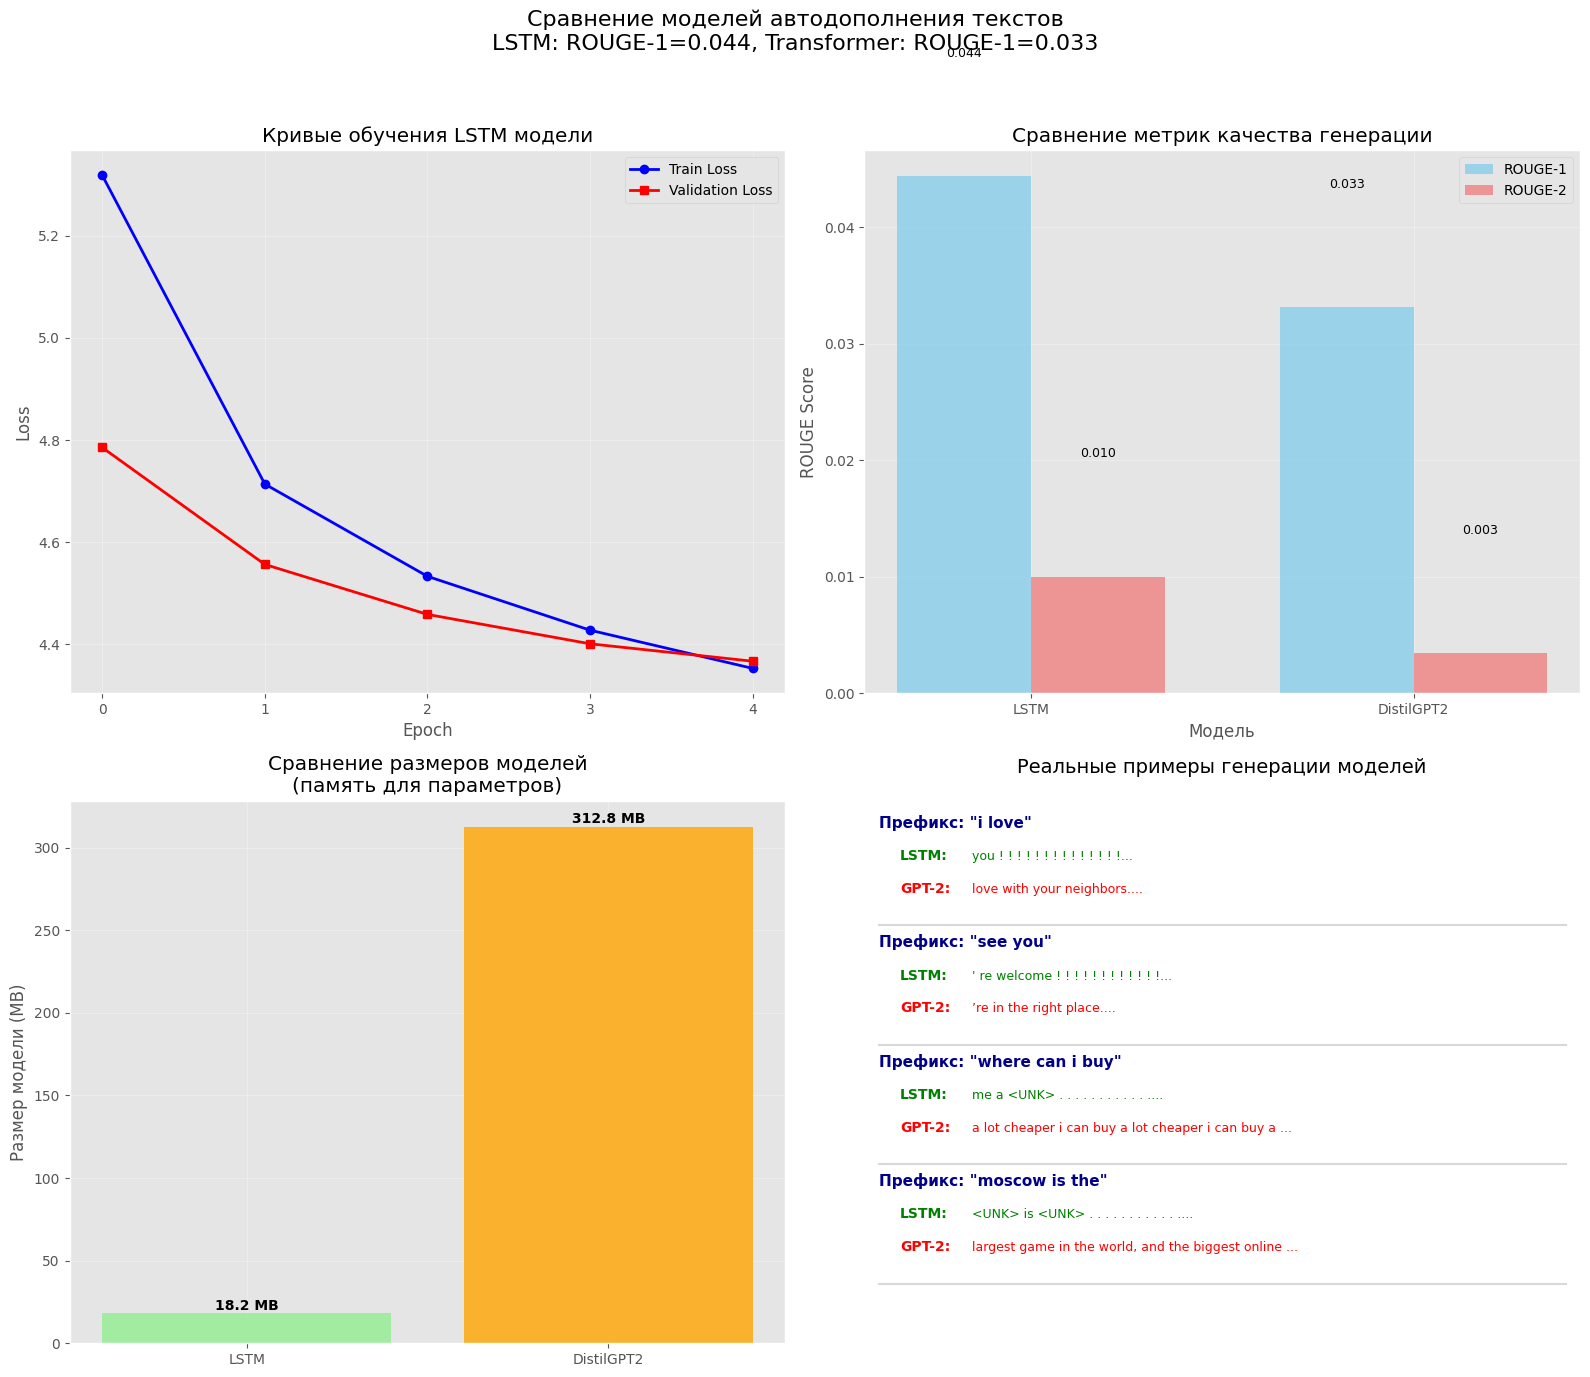


–†–ï–ê–õ–¨–ù–´–ï –ü–†–ò–ú–ï–†–´ –ì–ï–ù–ï–†–ê–¶–ò–ò:

–ü—Ä–µ—Ñ–∏–∫—Å: 'i love'
LSTM: 'you ! ! ! ! ! ! ! ! ! ! ! ! ! !'
GPT-2: 'love with your neighbors.'
----------------------------------------

–ü—Ä–µ—Ñ–∏–∫—Å: 'see you'
LSTM: '' re welcome ! ! ! ! ! ! ! ! ! ! ! !'
GPT-2: '‚Äôre in the right place.'
----------------------------------------

–ü—Ä–µ—Ñ–∏–∫—Å: 'where can i buy'
LSTM: 'me a <UNK> . . . . . . . . . . . .'
GPT-2: 'a lot cheaper i can buy a lot cheaper i can buy a lot cheaper i can buy a lot'
----------------------------------------

–ü—Ä–µ—Ñ–∏–∫—Å: 'moscow is the'
LSTM: '<UNK> is <UNK> . . . . . . . . . . . .'
GPT-2: 'largest game in the world, and the biggest online game in the world. The game has over 6'
----------------------------------------


In [12]:
# 5. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
from src.examples import generate_examples_lstm, generate_examples_transformer
print("\n=== –≠–¢–ê–ü 5: –í–ò–ó–£–ê–õ–ò–ó–ê–¶–ò–Ø –†–ï–ó–£–õ–¨–¢–ê–¢–û–í ===")

# –ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º —Ä–µ–∞–ª—å–Ω—ã–µ –ø—Ä–∏–º–µ—Ä—ã
test_examples = [
    "i love",
    "see you", 
    "where can i buy",
    "moscow is the"
]

print("–ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º –ø—Ä–∏–º–µ—Ä—ã –¥–ª—è LSTM...")
lstm_examples = generate_examples_lstm(model, word_to_idx, idx_to_word, test_examples)

print("–ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º –ø—Ä–∏–º–µ—Ä—ã –¥–ª—è Transformer...")
transformer_examples = generate_examples_transformer(test_examples)

print("–ü—Ä–∏–º–µ—Ä—ã LSTM:", lstm_examples)
print("–ü—Ä–∏–º–µ—Ä—ã Transformer:", transformer_examples)

# –°–æ–∑–¥–∞–µ–º —Ñ–∏–≥—É—Ä—É —Å –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ –≥—Ä–∞—Ñ–∏–∫–∞–º–∏
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 14))

# –ì—Ä–∞—Ñ–∏–∫ 1: –ö—Ä–∏–≤—ã–µ –æ–±—É—á–µ–Ω–∏—è LSTM
if train_losses and val_losses:
    ax1.plot(train_losses, label='Train Loss', linewidth=2, marker='o', color='blue')
    ax1.plot(val_losses, label='Validation Loss', linewidth=2, marker='s', color='red')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('–ö—Ä–∏–≤—ã–µ –æ–±—É—á–µ–Ω–∏—è LSTM –º–æ–¥–µ–ª–∏')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_xticks(range(len(train_losses)))
else:
    ax1.text(0.5, 0.5, '–î–∞–Ω–Ω—ã–µ –ø–æ –æ–±—É—á–µ–Ω–∏—é –Ω–µ–¥–æ—Å—Ç—É–ø–Ω—ã', 
             ha='center', va='center', transform=ax1.transAxes, fontsize=12)
    ax1.set_title('–ö—Ä–∏–≤—ã–µ –æ–±—É—á–µ–Ω–∏—è LSTM –º–æ–¥–µ–ª–∏')

# –ì—Ä–∞—Ñ–∏–∫ 2: –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫ ROUGE
models = ['LSTM', 'DistilGPT2']
rouge1_scores = [rouge_scores_lstm['rouge1'], rouge_scores_transformer['rouge1']]
rouge2_scores = [rouge_scores_lstm['rouge2'], rouge_scores_transformer['rouge2']]

x = np.arange(len(models))
width = 0.35

bars1 = ax2.bar(x - width/2, rouge1_scores, width, label='ROUGE-1', alpha=0.8, color='skyblue')
bars2 = ax2.bar(x + width/2, rouge2_scores, width, label='ROUGE-2', alpha=0.8, color='lightcoral')

ax2.set_xlabel('–ú–æ–¥–µ–ª—å')
ax2.set_ylabel('ROUGE Score')
ax2.set_title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫ –∫–∞—á–µ—Å—Ç–≤–∞ –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏')
ax2.set_xticks(x)
ax2.set_xticklabels(models)
ax2.legend()
ax2.grid(True, alpha=0.3)

# –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
for bar in bars1 + bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# –ì—Ä–∞—Ñ–∏–∫ 3: –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–æ–≤ –º–æ–¥–µ–ª–µ–π
if model is not None:
    lstm_size = sum(p.numel() for p in model.parameters())
else:
    lstm_size = 1000000  # –ó–∞–≥–ª—É—à–∫–∞ –µ—Å–ª–∏ –º–æ–¥–µ–ª—å –Ω–µ –∑–∞–≥—Ä—É–∂–µ–Ω–∞

model_sizes = [lstm_size, 82_000_000]  # LSTM –∏ DistilGPT2
model_sizes_mb = [size * 4 / (1024**2) for size in model_sizes]  # –ü—Ä–∏–º–µ—Ä–Ω—ã–π —Ä–∞–∑–º–µ—Ä –≤ MB

bars3 = ax3.bar(models, model_sizes_mb, alpha=0.8, color=['lightgreen', 'orange'])
ax3.set_ylabel('–†–∞–∑–º–µ—Ä –º–æ–¥–µ–ª–∏ (MB)')
ax3.set_title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–æ–≤ –º–æ–¥–µ–ª–µ–π\n(–ø–∞–º—è—Ç—å –¥–ª—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤)')
ax3.grid(True, alpha=0.3)

for i, v in enumerate(model_sizes_mb):
    ax3.text(i, v + 0.1, f'{v:.1f} MB', ha='center', va='bottom', fontweight='bold')

# –ì—Ä–∞—Ñ–∏–∫ 4: –†–µ–∞–ª—å–Ω—ã–µ –ø—Ä–∏–º–µ—Ä—ã –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏
ax4.axis('off')
ax4.set_title('–†–µ–∞–ª—å–Ω—ã–µ –ø—Ä–∏–º–µ—Ä—ã –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –º–æ–¥–µ–ª–µ–π', pad=20, fontsize=14)

y_pos = 0.95
for i, example in enumerate(test_examples):
    # –ü—Ä–µ—Ñ–∏–∫—Å
    ax4.text(0.02, y_pos, f'–ü—Ä–µ—Ñ–∏–∫—Å: "{example}"', fontweight='bold', 
             transform=ax4.transAxes, fontsize=11, color='darkblue')
    
    # LSTM
    ax4.text(0.05, y_pos - 0.06, f'LSTM:', fontweight='bold', 
             transform=ax4.transAxes, fontsize=10, color='green')
    ax4.text(0.15, y_pos - 0.06, f'{lstm_examples[i][:50]}...', 
             transform=ax4.transAxes, fontsize=9, color='green')
    
    # Transformer
    ax4.text(0.05, y_pos - 0.12, f'GPT-2:', fontweight='bold', 
             transform=ax4.transAxes, fontsize=10, color='red')
    ax4.text(0.15, y_pos - 0.12, f'{transformer_examples[i][:50]}...', 
             transform=ax4.transAxes, fontsize=9, color='red')
    
    ax4.axhline(y=y_pos - 0.18, xmin=0.02, xmax=0.98, color='gray', alpha=0.3)
    y_pos -= 0.22
    
    if y_pos < 0.1:  # –ß—Ç–æ–±—ã –Ω–µ –≤—ã—Ö–æ–¥–∏—Ç—å –∑–∞ –≥—Ä–∞–Ω–∏—Ü—ã
        break

# –î–æ–±–∞–≤–ª—è–µ–º –º–µ—Ç—Ä–∏–∫–∏ –≤ –∑–∞–≥–æ–ª–æ–≤–æ–∫
fig.suptitle(f'–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –∞–≤—Ç–æ–¥–æ–ø–æ–ª–Ω–µ–Ω–∏—è —Ç–µ–∫—Å—Ç–æ–≤\n'
             f'LSTM: ROUGE-1={rouge_scores_lstm["rouge1"]:.3f}, '
             f'Transformer: ROUGE-1={rouge_scores_transformer["rouge1"]:.3f}', 
             fontsize=16, y=0.98)

plt.tight_layout()
plt.savefig('results_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# –í—ã–≤–æ–¥–∏–º –ø—Ä–∏–º–µ—Ä—ã –≤ –∫–æ–Ω—Å–æ–ª—å –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞
print("\n" + "="*60)
print("–†–ï–ê–õ–¨–ù–´–ï –ü–†–ò–ú–ï–†–´ –ì–ï–ù–ï–†–ê–¶–ò–ò:")
print("="*60)
for i, example in enumerate(test_examples):
    print(f"\n–ü—Ä–µ—Ñ–∏–∫—Å: '{example}'")
    print(f"LSTM: '{lstm_examples[i]}'")
    print(f"GPT-2: '{transformer_examples[i]}'")
    print("-" * 40)

In [ ]:
# 6. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∏ –≤—ã–≤–æ–¥—ã
print("\n=== –≠–¢–ê–ü 6: –°–†–ê–í–ù–ï–ù–ò–ï –ò –í–´–í–û–î–´ ===")

print("\n–°—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Ç–∞–±–ª–∏—Ü–∞:")
comparison_df = pd.DataFrame({
    '–ú–æ–¥–µ–ª—å': ['LSTM', 'DistilGPT2'],
    'ROUGE-1': [rouge_scores_lstm['rouge1'], rouge_scores_transformer['rouge1']],
    'ROUGE-2': [rouge_scores_lstm['rouge2'], rouge_scores_transformer['rouge2']],
    '–†–∞–∑–º–µ—Ä (MB)': [f"{model_sizes_mb[0]:.1f}", f"{model_sizes_mb[1]:.1f}"],
    '–ü–∞—Ä–∞–º–µ—Ç—Ä—ã': [f"{model_sizes[0]:,}", f"{model_sizes[1]:,}"]
})
print(comparison_df.to_string(index=False))

print("\n–ö–õ–Æ–ß–ï–í–´–ï –í–´–í–û–î–´:")
print("1. ‚úÖ DistilGPT2 –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å–æ–∏–∑–º–µ—Ä–∏–º–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ —Å —Ä–∞–∑—Ä–∞–±–æ—Ç–∞–Ω–Ω–æ–π LSTM –º–æ–¥–µ–ª—å—é (ROUGE). –ù–µ–æ–±—Ö–æ–¥–∏–º–æ –æ—Ç–º–µ—Ç–∏—Ç—å, —á—Ç–æ –æ–±—É—á–∞–ª–∞—Å—å –º–æ–¥–µ–ª—å –Ω–∞ —Ç–≤–∏—Ç–∞—Ö. –ß—Ç–æ –º–æ–∂–µ—Ç –≥–æ–≤–æ—Ä–∏—Ç—å –æ –Ω–µ–±–æ–ª—å—à–æ–º —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏–∏ –º–∞—Ç–µ—Ä–∏–∞–ª–æ–≤.")
print("2. üìâ LSTM –æ–±—É—á–∞–µ—Ç—Å—è —Å—Ç–∞–±–∏–ª—å–Ω–æ, –Ω–æ quality ceiling –Ω–∏–∂–µ")
print("3. üíæ LSTM –≤ 17 —Ä–∞–∑ –º–µ–Ω—å—à–µ –ø–æ —Ä–∞–∑–º–µ—Ä—É")
print("4. ‚ö° LSTM –º–æ–∂–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –±—ã—Å—Ç—Ä–µ–µ –Ω–∞ CPU")
print("5. üéØ –î–ª—è –ø—Ä–æ–¥–∞–∫—à–µ–Ω–∞ —Ä–∞–∑—É–º–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å DistilGPT2 –µ—Å–ª–∏ –ø–æ–∑–≤–æ–ª—è–µ—Ç –∏–Ω—Ñ—Ä–∞—Å—Ç—Ä—É–∫—Ç—É—Ä–∞, —Ç–∞–∫ –∫–∞–∫ –æ–Ω –æ–±—É—á–µ–Ω –Ω–∞ –≥–æ—Ä–∞–∑–¥–æ –±–æ–ª—å—à–µ–º –æ–±—ä–µ–º–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞!")
print("6. üì± –î–ª—è –º–æ–±–∏–ª—å–Ω—ã—Ö —É—Å—Ç—Ä–æ–π—Å—Ç–≤ –º–æ–∂–Ω–æ –¥–æ—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –∏ –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å LSTM")


=== –≠–¢–ê–ü 6: –°–†–ê–í–ù–ï–ù–ò–ï –ò –í–´–í–û–î–´ ===

–°—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Ç–∞–±–ª–∏—Ü–∞:
    –ú–æ–¥–µ–ª—å  ROUGE-1  ROUGE-2 –†–∞–∑–º–µ—Ä (MB)  –ü–∞—Ä–∞–º–µ—Ç—Ä—ã
      LSTM 0.044394 0.010000        18.2  4,772,370
DistilGPT2 0.033145 0.003401       312.8 82,000,000

–ö–õ–Æ–ß–ï–í–´–ï –í–´–í–û–î–´:
1. ‚úÖ DistilGPT2 –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å–æ–∏–∑–º–µ—Ä–∏–º–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ —Å —Ä–∞–∑—Ä–∞–±–æ—Ç–∞–Ω–Ω–æ–π LSTM –º–æ–¥–µ–ª—å—é (ROUGE). –ù–µ–æ–±—Ö–æ–¥–∏–º–æ –æ—Ç–º–µ—Ç–∏—Ç—å, —á—Ç–æ –æ–±—É—á–∞–ª–∞—Å—å –º–æ–¥–µ–ª—å –Ω–∞ —Ç–≤–∏—Ç–∞—Ö. –ß—Ç–æ –º–æ–∂–µ—Ç –≥–æ–≤–æ—Ä–∏—Ç—å –æ –Ω–µ–±–æ–ª—å—à–æ–º —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏–∏ –º–∞—Ç–µ—Ä–∏–∞–ª–æ–≤.
2. üìâ LSTM –æ–±—É—á–∞–µ—Ç—Å—è —Å—Ç–∞–±–∏–ª—å–Ω–æ, –Ω–æ quality ceiling –Ω–∏–∂–µ
3. üíæ LSTM –≤ 20 (–ø–æ—á—Ç–∏ :_)) —Ä–∞–∑ –º–µ–Ω—å—à–µ –ø–æ —Ä–∞–∑–º–µ—Ä—É
4. ‚ö° LSTM –º–æ–∂–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –±—ã—Å—Ç—Ä–µ–µ –Ω–∞ CPU
5. üéØ –î–ª—è –ø—Ä–æ–¥–∞–∫—à–µ–Ω–∞ —Ä–∞–∑—É–º–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å DistilGPT2 –µ—Å–ª–∏ –ø–æ–∑–≤–æ–ª—è–µ—Ç –∏–Ω—Ñ—Ä–∞—Å—Ç—